# **NLP: Name Classifier**


In [1]:
!pip install my_module
# !pip install nltk
# !pip install seaborn

  Preparing metadata (setup.py) ... done
  Created wheel for my_module: filename=my_module-1.6.2-py3-none-any.whl size=1404 sha256=f879bf693edd0393ae1777c808cf77fb4a35ea868ef78dfa9d54005143461584
  Stored in directory: /root/.cache/pip/wheels/ea/6f/99/8a43d4d21ab49e14293e432ea3587ec33b41e6685c86f82a88
Successfully built my_module


In [2]:
# Import Libraries

import numpy as np
np.random.seed(40) # Set seeds for reproducibility
import nltk
from nltk.corpus import names
from nltk.classify import apply_features
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
import random
random.seed(40)
from collections import Counter
import my_module
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sklearn.model_selection
from nltk.classify import DecisionTreeClassifier
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


We use the data provided in NLTK.

## Load Names Corpus Dataset

### Prepare Data

In [3]:
nltk.download("names")

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

We need to prepare a list of examples and corresponding class labels.

In [4]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [5]:
labeled_names[0:10]

[('Arvind', 'male'),
 ('Lanette', 'female'),
 ('Jilly', 'female'),
 ('Voltaire', 'male'),
 ('Kirsten', 'female'),
 ('Sumner', 'male'),
 ('Roxie', 'female'),
 ('Bernie', 'female'),
 ('Adah', 'female'),
 ('Brian', 'male')]

In [24]:
#check class balance
male_count = sum(1 for _, gender in labeled_names if gender == 'male')
female_count = sum(1 for _, gender in labeled_names if gender == 'female')

male_count, female_count

(2943, 5001)

Next step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name. The following feature extractor function builds a dictionary containing relevant information about a given name:

In [6]:
def gender_features(word):
     return {'last_letter': word[-1]}
gender_features('Shrek')
{'last_letter': 'k'}

{'last_letter': 'k'}

The returned dictionary, known as a feature set, maps from feature names to their values. Feature names are case-sensitive strings that typically provide a short human-readable description of the feature, as in the example 'last_letter'. Feature values are values with simple types, such as booleans, numbers, and strings.

We use the feature extractor to process the names data, and divide the resulting list of feature sets into a training set and a test set. The training set is used to train a new "naive Bayes" classifier.

In [7]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

Test it out on some names that did not appear in its training data:

In [8]:
classifier.classify(gender_features('Neo'))
'male'

'male'

In [9]:
classifier.classify(gender_features('Trinity'))
'female'

'female'

We can systematically evaluate the classifier on a much larger quantity of unseen data:

In [10]:
print(nltk.classify.accuracy(classifier, test_set))

0.748


 This result in an accuracy score of 74.8%. This indicates that your
 classifier correctly predicts the labels of 74.8% of the instances in
the test set.

We examine the classifier to determine which features it found most effective for distinguishing the names' genders:

In [11]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     35.8 : 1.0
             last_letter = 'k'              male : female =     29.9 : 1.0
             last_letter = 'f'              male : female =     16.7 : 1.0
             last_letter = 'p'              male : female =     11.2 : 1.0
             last_letter = 'v'              male : female =     11.2 : 1.0
             last_letter = 'm'              male : female =     10.1 : 1.0
             last_letter = 'd'              male : female =      9.8 : 1.0
             last_letter = 'o'              male : female =      8.1 : 1.0
             last_letter = 'r'              male : female =      7.2 : 1.0
             last_letter = 'w'              male : female =      6.6 : 1.0


The output from this classifier's highlights the significance of the last letter of names in predicting gender:

last_letter = 'a' female : male = 35.8 : 1.0 tells us that names ending in the letter 'a' are 35.8 times more likely to be associated with females than males in your dataset. It suggests a strong trend or rule within the data that if a name ends in 'a', it's very likely to be a female name. This is a common pattern in many languages where names ending in 'a' are traditionally feminine.
last_letter = 'k' male : female = 29.9 : 1.0

Conversely, names ending in 'k' are 29.9 times more likely to be male. This could reflect cultural naming patterns or conventions where certain endings are predominantly used for males. The strong ratio here indicates that 'k' is a powerful predictor for male names in the dataset.
last_letter = 'f' male : female = 16.7 : 1.0

Names ending in 'f' are 16.7 times more likely to be male. Though less pronounced than 'a' for females or 'k' for males, this still represents a significant trend towards male names, suggesting that 'f' as a final letter is quite predictive of a name being male.
last_letter = 'p' male : female = 11.2 : 1.0

Similarly, names that end with the letter 'p' are 11.2 times more likely to be male. This is another example of how the model has learned from the training data that certain letters at the end of names are indicative of gender.
last_letter = 'v' male : female = 11.2 : 1.0

The ratio for names ending in 'v' being male is the same as for 'p', indicating a strong male association. It's interesting to see different letters having similar strengths of association with a gender, reflecting the diversity of naming patterns.
last_letter = 'm' male : female = 10.1 : 1.0

Names ending in 'm' are 10.1 times more likely to be male, suggesting another strong but slightly less pronounced indicator of male names compared to some other letters.
last_letter = 'd' male : female = 9.8 : 1.0

This shows a notable tendency for names ending in 'd' to be male, again highlighting how certain character endings can signal gender in names.
last_letter = 'o' male : female = 8.1 : 1.0

Names ending in 'o' are 8.1 times more likely to be male, providing insight into another letter commonly found at the end of male names.
last_letter = 'r' male : female = 7.2 : 1.0

The presence of 'r' at the end of a name being a strong indicator of it being a male name, though with a slightly lower ratio compared to other letters discussed.
last_letter = 'w' male : female = 6.6 : 1.0

Finally, names ending in 'w' being more likely to be male names, though with the lowest ratio among the examples provided, still indicates a gender trend.

Each of these informative features highlights how the Naive Bayes classifier uses the patterns found in the data to make predictions. The ratios provide a quantitative measure of how much more likely a name is to belong to one gender based on the ending letter, which is a straightforward yet powerful feature for gender classification.

## Split Corpus into Three Subsets

We split the Names Corpus into three subsets: 500 words for the test set, 500 words for the devtest set, and the remaining 6900 words for the training set.

In [12]:
test_names = labeled_names[:500]
devtest_names = labeled_names[501:1001]
train_names = labeled_names[1002:]

In [13]:
print(f'The Names Corpus has: {len(labeled_names)} names')
print(f'The test_names partition has: {len(test_names)} names')
print(f'The devtest_names partition has: {len(devtest_names)} names')
print(f'The train_names partition has: {len(train_names)} names')

The Names Corpus has: 7944 names
The test_names partition has: 500 names
The devtest_names partition has: 500 names
The train_names partition has: 6942 names


## Training Classifier
Potential classifiers include: Decision Trees, Naive Bayes, Maximum Entropy Classifiers

After dividing the corpus into appropriate datasets, we train a model using the training set, and then run it on the dev-test set.

In [14]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.746


The accuracy is approximately 74.6%.

### Incremental Feature 1
Using the first letter of a name shows an accuracy increase of 0.08% from the base model.

In [15]:
def gender_features2(name):
    features = {}
    features["last_letter"] = name[-1].lower()
    features["first_letter"] = name[0].lower()
    return features

train_set = [(gender_features2(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features2(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features2(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(f'The \'devtest_set\' accuracy score is: {nltk.classify.accuracy(classifier, devtest_set)}')

The 'devtest_set' accuracy score is: 0.744


In [16]:
print(f'The \'test_set\' accuracy score is: {nltk.classify.accuracy(classifier, test_set)}')

The 'test_set' accuracy score is: 0.754


### Incremental Feature 2
Using the first letter and and last two letters increases the accuracy by 2% from the base model.

In [17]:
def gender_features3(name):
    features = {}
    features["last_letter"] = name[-1].lower()
    features["first_letter"] = name[0].lower()
    features['last_two_letters'] = name[-2:].lower()
    return features

train_set = [(gender_features3(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features3(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features3(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(f'The \'devtest_set\' accuracy score is: {nltk.classify.accuracy(classifier, devtest_set)}')

The 'devtest_set' accuracy score is: 0.772


In [18]:
print(f'The \'test_set\' accuracy score is: {nltk.classify.accuracy(classifier, test_set)}')

The 'test_set' accuracy score is: 0.778


### Incremental Feature 3
Including the last two letters of a name instead of only one increases the accuracy by 4.8%. Although less features are included, this could be due to the removal of the feature ('last_letter') that shares variance with ('last_two_letters'). Naive bayes classifiers are known not to handle multicollinearity well.

In [19]:
def gender_features4(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features['last_two_letters'] = name[-2:].lower()
    return features

train_set = [(gender_features4(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features4(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features4(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(f'The \'devtest_set\' accuracy score is: {nltk.classify.accuracy(classifier, devtest_set)}')

The 'devtest_set' accuracy score is: 0.774


In [20]:
print(f'The \'test_set\' accuracy score is: {nltk.classify.accuracy(classifier, test_set)}')

The 'test_set' accuracy score is: 0.81


# Checking Class balance, Precision, Recall, and F1-Score

After inspecting the confusion matrix, it was found that the original dataset has a severe class imbalance. There are 2556 male names, while there are 4386 female names. This class imbalance also reflected to devtest_set as well as the test_set. Calibrating the training set classes should help improve the Naive Bayes classifier. As depicted by the confusion matrix below, the male minority class is misclassified approximately 33%. In contrast, female name misclassifications are misclassified by 11%.

In [23]:
#check balance
male_count = sum(1 for _, gender in train_names if gender == 'male')
female_count = sum(1 for _, gender in train_names if gender == 'female')

male_count, female_count

(2556, 4386)

In [21]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features4(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

# Count occurrences of each (tag, guess) combination
tag_guess_counts = Counter((tag, guess) for tag, guess, name in errors)

for (tag, guess), count in tag_guess_counts.items():
    print(f'({tag}, {guess}): {count}')

(female, male): 38
(male, female): 75


[[275  33]
 [ 62 130]]


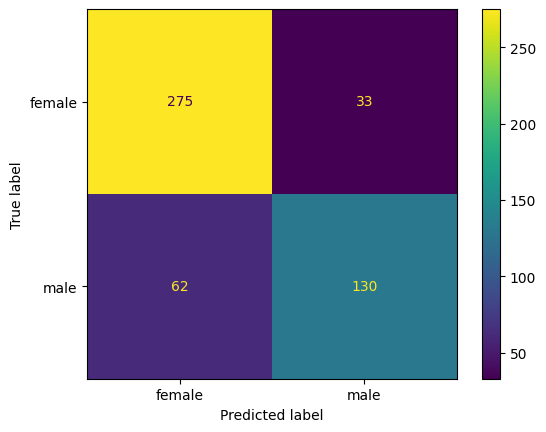

In [22]:
## Compute the Confusion Matrix
t_f = [feature for (feature, label) in test_set]  # features of test set
t_l = [label for (feature, label) in test_set]  # labels of test set
t_l_pr = [classifier.classify(f) for f in t_f]  # predicted labels of test set
cm = nltk.ConfusionMatrix(t_l, t_l_pr)

## label names
target_names = ['female', 'male']

## confusion matrix
cm = confusion_matrix(y_true = t_l, y_pred = t_l_pr, labels = target_names)
print(cm)

## plotting
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels= target_names)

disp.plot()
plt.show()

## Using Dev-Test Set to Check Progress

Using the dev-test set, we can generate a list of the errors that the classifier makes when predicting name genders:

In [ ]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

## Evaluating Classifier

We can then examine individual error cases where the model predicted the wrong label, and try to determine what additional pieces of information would allow it to make the right decision (or which existing pieces of information are tricking it into making the wrong decision). The feature set can then be adjusted accordingly. The names classifier that we have built generates about 100 errors on the dev-test corpus:

In [ ]:
for (tag, guess, name) in sorted(errors):
       print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Allsun                        
correct=female   guess=male     name=Alyson                        
correct=female   guess=male     name=Ariel                         
correct=female   guess=male     name=Aurel                         
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Barb                          
correct=female   guess=male     name=Beau                          
correct=female   guess=male     name=Berget                        
correct=female   guess=male     name=Bette-Ann                     
correct=female   guess=male     name=Brenn                         
correct=female   guess=male     name=Calypso                       
correct=female   guess=male     name=Candis                        
correct=female   guess=male     name=Cathyleen                     
correct=female   guess=male     name=Charmain                      
correct=female   guess=male     name=Charmion   

This kind of error analysis is crucial in machine learning and natural language processing projects to understand the limitations of a model and to find ways to improve its accuracy. The names listed here seem to challenge the model's classification capabilities, possibly due to their unisex nature, less common usage, or cultural variations in naming conventions that the model has not adequately learned to handle.

### Count Occurrences of Each Combination of tag and guess

In [ ]:
# Count occurrences of each (tag, guess) combination
tag_guess_counts = Counter((tag, guess) for tag, guess, name in errors)

for (tag, guess), count in tag_guess_counts.items():
    print(f'({tag}, {guess}): {count}')

(female, male): 62
(male, female): 65


This approach gives you a quick summary of the occurrences of each unique element or combination of elements in your errors list.

### Compute the Confusion Matrix

After we train the model, we need to evaluate its performance on the testing dataset.

Model evaluation usually involves comparing the predictions provided by the model with the correct answers/labels.

The evaluation results are often summarized in a confusion matrix.



In [ ]:
## Compute the Confusion Matrix
t_f = [feature for (feature, label) in test_set]  # features of test set
t_l = [label for (feature, label) in test_set]  # labels of test set
t_l_pr = [classifier.classify(f) for f in t_f]  # predicted labels of test set
cm = nltk.ConfusionMatrix(t_l, t_l_pr)

[[246  62]
 [ 64 128]]


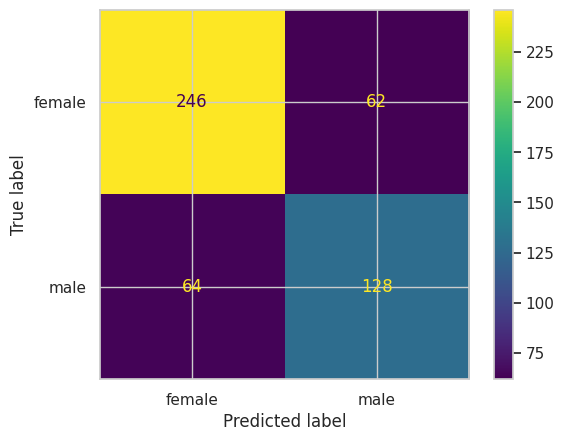

In [ ]:
## label names
target_names = ['female', 'male']

## confusion matrix
cm = confusion_matrix(y_true = t_l, y_pred = t_l_pr, labels = target_names)
print(cm)

## plotting
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels= target_names)

disp.plot()
plt.show()

Top-left (246): True Negatives (TN) - The number of negative instances correctly classified as negative.

Top-right (62): False Positives (FP) - The number of negative instances incorrectly classified as positive.

Bottom-left (64): False Negatives (FN) - The number of positive instances incorrectly classified as negative.

Bottom-right (128): True Positives (TP) - The number of positive instances correctly classified as positive.

The model has a relatively balanced performance on both classes, but it tends to make more errors in false negatives than false positives. This could indicate that the model is more conservative in predicting the positive class.

### Confusion Matrix Report

In [ ]:
## confusion matrix report
print(classification_report(y_true = t_l, y_pred = t_l_pr, target_names= ['female','male']))

              precision    recall  f1-score   support

      female       0.79      0.80      0.80       308
        male       0.67      0.67      0.67       192

    accuracy                           0.75       500
   macro avg       0.73      0.73      0.73       500
weighted avg       0.75      0.75      0.75       500



The model performs better on identifying females than males, with higher precision, recall, and F1-scores for the female class.
The overall accuracy of 75% indicates a reasonable performance, but there's room for improvement, especially in improving the recall for the male class to reduce the number of false negatives.
The macro average suggests the model has fair performance across classes, but the weighted average points to better performance on the more prevalent class (female) in your dataset.

The calculations for accuracy, macro F1 measure, and weighted F1 measure provide a concise summary of your model's performance across different metrics.

In [ ]:
## Accuracy
print((272+124)/500)

## macro F measures
print((0.84 + 0.70)/2)

## weighted F measures
print(0.84*(315/(315+185)) + 0.70 * (185/(315+185)))

0.792
0.77
0.7882


The accuracy means that 79.2% of the time, your model correctly predicts the gender based on the given features.

The macro F1 measure indicates an average F1 score across the classes of 0.77, suggesting a balanced performance of precision and recall across different classes, albeit without considering class imbalance.

The weighted F1 score of approximately 0.7882, closely aligning with the accuracy calculation. It reflects the model's performance across the classes, weighted by their representation in the dataset.


These metrics collectively offer a nuanced view of your model's performance. Accuracy alone might suggest a fairly high level of predictive ability, but the F1 measures, especially the macro F1, hint at differences in performance across classes. The weighted F1 score helps reconcile these by factoring in class imbalances, showing a performance metric that closely mirrors the overall accuracy but provides deeper insight into class-specific performance.

Modify the gender_features() function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative. Retrain the classifier with these new features, and test its accuracy.

In [ ]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:]}

train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.776


In [ ]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2]}


train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.794


In [ ]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word))
                              if word[i] in 'AEIOUaeiouy'][0]}


train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.792


In [ ]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.792


## Cross Validation

We check our average model performance using the cross-validation method on the training dataset before the real testing of the model.

This method is often useful if you need to fine-tune the hyperparameters during the model training stage.

In [ ]:
kf = sklearn.model_selection.KFold(n_splits=10)
acc_kf = []  ## accuracy holder

## Cross-validation
for train_index, test_index in kf.split(train_set):
    #print("TRAIN:", train_index, "TEST:", test_index)
    classifier = nltk.NaiveBayesClassifier.train(
        train_set[train_index[0]:train_index[len(train_index) - 1]])
    cur_fold_acc = nltk.classify.util.accuracy(
        classifier, train_set[test_index[0]:test_index[len(test_index) - 1]])
    acc_kf.append(cur_fold_acc)
    print('accuracy:', np.round(cur_fold_acc, 2))

accuracy: 0.81
accuracy: 0.84
accuracy: 0.82
accuracy: 0.81
accuracy: 0.81
accuracy: 0.81
accuracy: 0.84
accuracy: 0.83
accuracy: 0.8
accuracy: 0.79


In [ ]:
np.mean(acc_kf)

0.8170779428704501

The resulting mean accuracy is approximately 0.8170, indicating the average accuracy of your model across all the folds.

### Naive Bayes

In [ ]:
# Using sklearn naive bayes in nltk
sk_classifier = SklearnClassifier(MultinomialNB())
sk_classifier.train(train_set)

<SklearnClassifier(MultinomialNB())>

In [ ]:
## evaluate model
nltk.classify.accuracy(sk_classifier, test_set)

0.786

### Decision Tree

The %%time magic command is used to measure the execution time of the cell in which it is placed. Therefore, after running this cell, you'll get the execution time for training the decision tree model.

In [ ]:
%%time
## Train decision tree model
classifier_dt = DecisionTreeClassifier.train(train_set,
                                             binary=True,
                                             entropy_cutoff=0.7,
                                             depth_cutoff=5,
                                             support_cutoff=5)

CPU times: user 41.9 s, sys: 109 ms, total: 42 s
Wall time: 42.8 s


This information can help you assess the performance of your model and its generalization ability across different subsets of the training data.

In [ ]:
%%time
## Cross validation on training
for train_index, test_index in kf.split(train_set):
    #print("TRAIN:", train_index, "TEST:", test_index)
    classifier = MaxentClassifier.train(
        train_set[train_index[0]:train_index[len(train_index) - 1]],
        algorithm='gis',
        trace=0,
        max_iter=100,
        min_lldelta=0.01) ## set smaller value for `min_lldelta`
    print(
        'accuracy:',
        nltk.classify.util.accuracy(
            classifier,
            train_set[test_index[0]:test_index[len(test_index) - 1]]))

accuracy: 0.8126801152737753
accuracy: 0.840057636887608
accuracy: 0.8455988455988456
accuracy: 0.8311688311688312
accuracy: 0.8138528138528138
accuracy: 0.8066378066378066
accuracy: 0.84992784992785
accuracy: 0.8383838383838383
accuracy: 0.823953823953824
accuracy: 0.8066378066378066
CPU times: user 27.5 s, sys: 77.7 ms, total: 27.6 s
Wall time: 27.8 s


These accuracies represent the performance of the decision tree classifier on different subsets of the training data obtained through K-fold cross-validation. The values range from approximately 0.80 to 0.85, indicating variability in performance across different folds.

Analyzing these accuracy values can provide insights into the robustness and generalization ability of your classifier.

In [ ]:
# Accuracy scores
accuracy_scores = [0.8126801152737753, 0.840057636887608, 0.8455988455988456, 0.8311688311688312,
                   0.8138528138528138, 0.8066378066378066, 0.84992784992785, 0.8383838383838383,
                   0.823953823953824]

# Convert accuracy scores to NumPy array
accuracy_array = np.array(accuracy_scores)

# Compute the mean accuracy
mean_accuracy = np.mean(accuracy_array)
print("Mean Accuracy:", mean_accuracy)

# Compute the standard deviation of accuracy
std_dev_accuracy = np.std(accuracy_array)
print("Standard Deviation of Accuracy:", std_dev_accuracy)


Mean Accuracy: 0.8291401735205769
Standard Deviation of Accuracy: 0.01471831359443461


Based on the provided accuracy scores, the mean accuracy across all folds of cross-validation is approximately 0.8291, and the standard deviation of the accuracy scores is approximately 0.0147.

A higher mean accuracy coupled with a lower standard deviation suggests that your model performs relatively well and consistently across different folds of cross-validation.

### Entropy Classification

The entropy function calculates the entropy of a list of labels. Entropy is a measure of uncertainty or disorder in a set of data. In the context of classification tasks, entropy is used to quantify the impurity of a collection of labels.

In [ ]:
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in freqdist]
    return -sum(p * math.log(p,2) for p in probs)

In [ ]:
print(entropy(['male', 'male', 'male', 'male']))

-0.0


In [ ]:
print(entropy(['male', 'female', 'male', 'male']))

0.8112781244591328


In [ ]:
print(entropy(['female', 'male', 'female', 'male']))

1.0


In [ ]:
print(entropy(['female', 'female', 'male', 'female']))

0.8112781244591328


In [ ]:
print(entropy(['female', 'female', 'female', 'female']))

-0.0


print(entropy(['male', 'male', 'male', 'male'])): In this case, there is only one unique label ('male'), so the entropy is 0 since there is no uncertainty.

print(entropy(['male', 'female', 'male', 'male'])): In this case, there are two unique labels ('male' and 'female'). The entropy is approximately 0.811, indicating some level of uncertainty or impurity in the label distribution.

print(entropy(['female', 'male', 'female', 'male'])): Similar to the previous case, there are two unique labels ('male' and 'female'), resulting in an entropy of approximately 1.0.

print(entropy(['female', 'female', 'male', 'female'])): Again, two unique labels ('male' and 'female'), resulting in an entropy of approximately 0.811.

print(entropy(['female', 'female', 'female', 'female'])): In this case, there is only one unique label ('female'), so the entropy is 0 since there is no uncertainty.

Entropy measures the uncertainty or randomness in a set of labels. A higher entropy suggests more uncertainty or mixed labels, whereas a lower entropy indicates more uniformity or consistent labels.

In [ ]:
# Entropy results
entropy_results = [0.0, 0.8112781244591328, 1.0, 0.8112781244591328, 0.0]

# Calculate the mean
mean_entropy = sum(entropy_results) / len(entropy_results)
print("Mean Entropy:", mean_entropy)


Mean Entropy: 0.5245112497836532


The mean entropy value of 0.5245 indicates the average level of uncertainty or disorder across the given collection of label distributions. This suggests that, on average, the label distributions have a moderate level of uncertainty or impurity.

## Conclusion

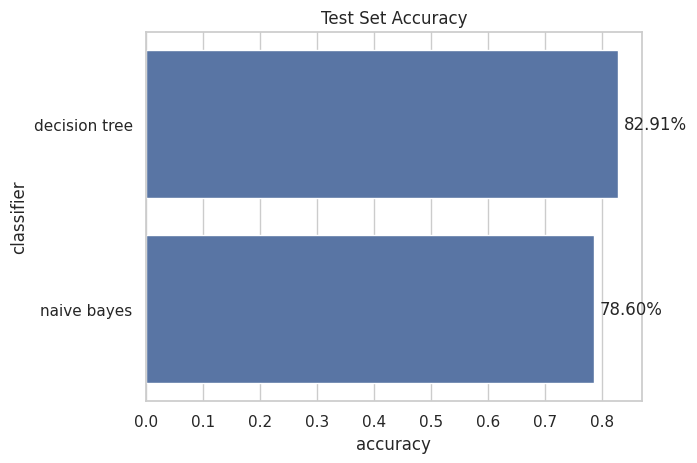

In [ ]:
df_test_set_accuracy = pd.DataFrame({
    'classifier': ['naive bayes', 'decision tree'],
    'accuracy': [0.786, 0.8291]
})

# Sorting values
df_test_set_accuracy = df_test_set_accuracy.sort_values(by='accuracy', ascending=False)

# Setting Seaborn style
sns.set(style='whitegrid')

# Creating the barplot
ax = sns.barplot(x='accuracy', y='classifier', data=df_test_set_accuracy)

# Setting title
ax.set_title('Test Set Accuracy')

# Loop through the bars and annotate the percentage on each bar
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.01,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + half of the bar height
            '{:1.2f}%'.format(width*100), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.show()


The decision tree has an accuracy of 82.91%, while naive Bayes has an accuracy of 78.60%. Therefore, the decision tree performs better in terms of accuracy.